# Video Game Sales Exploratory Data Analysis

In this notebook we're gonna explore the dataset of video game sales and perform exploratory data analysis

# Importing  libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Reading data

In [2]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

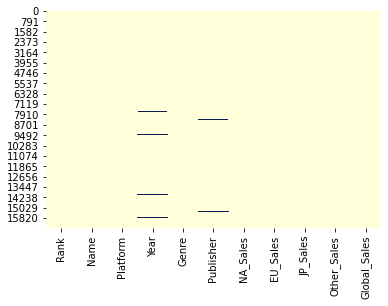

In [4]:
#check for missing values
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')

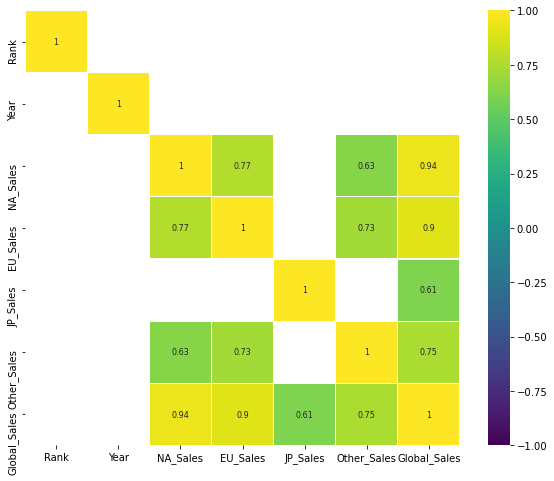

In [5]:
# columns with correlation more than 0.50
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr[(corr >= 0.50) | (corr <= -0.50)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Now let's do some exploratory data analysis on the dataset

In [7]:
# top 100 games according to their rank
top100=df.head(100)

<AxesSubplot:xlabel='Platform', ylabel='count'>

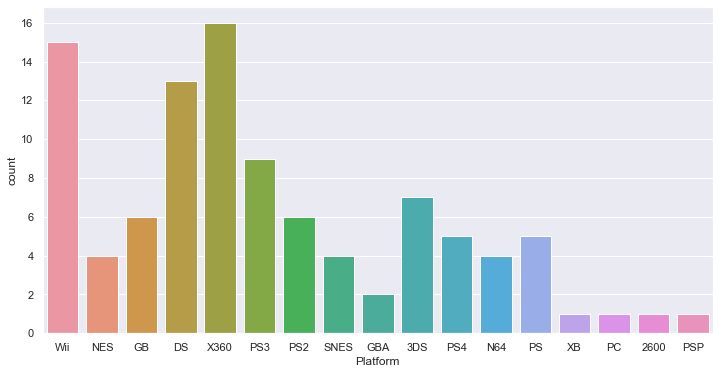

In [8]:
# let's look at the most popular platforms
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Platform',data=top100)

<AxesSubplot:xlabel='Genre', ylabel='count'>

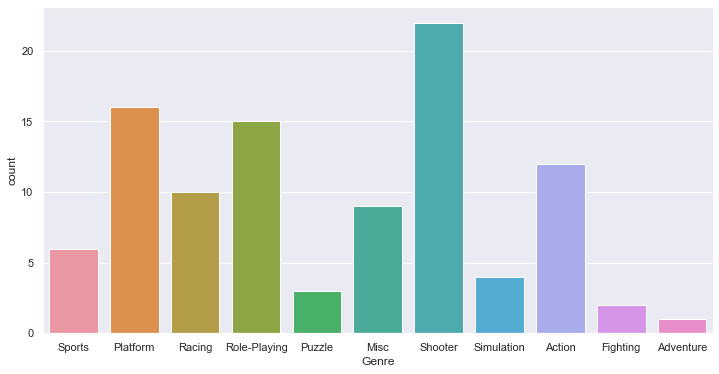

In [9]:
# let's look at the most popular genres
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Genre',data=top100)

In [10]:
pie_sale = go.Pie(  
   labels =top100['Publisher'],
   values = top100['Global_Sales'].value_counts(),
   domain=dict(x=[0, 0.5]),
   name='Sales',
   hole = 0.5,
   marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
)
data=pie_sale
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Sales w.r.t Publishers',
)

fig = go.Figure(data=data, layout=layout)

fig.show()

from the above pie chart we can see that Nintendo takes majority (54%) of sales among other platforms followed by 'Activion' and 'Take two interactive'

from the above graph we can see that 'Shooter' is the most popular genre among gamers

In [11]:
trace1 = go.Scatter(
                    x = top100.Rank,
                    y = top100.NA_Sales,
                    mode = "lines+markers",
                    name = "North America",
                    marker = dict(color = 'red',size=8),
                    text= top100.Name)

trace2 = go.Scatter(
                    x = top100.Rank,
                    y = top100.EU_Sales,
                    mode = "lines+markers",
                    name = "Europe",
                    marker = dict(color = 'cyan',size=8),
                    text= top100.Name)
trace3 = go.Scatter(
                    x = top100.Rank,
                    y = top100.JP_Sales,
                    mode = "lines+markers",
                    name = "Japan",
                    marker = dict(color = 'blue',size=8),
                    text= top100.Name)
trace4 = go.Scatter(
                    x = top100.Rank,
                    y = top100.Other_Sales,
                    mode = "lines+markers",
                    name = "Other",
                    marker = dict(color = 'green',size=8),
                    text= top100.Name)
                    

trace = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',gridcolor="black"),
              yaxis= dict(title= 'Sales(In Millions)',gridcolor="black",),
              plot_bgcolor='light yellow' )
fig = dict(data = trace, layout = layout)
iplot(fig)

from the above graph we can see that see that 'Wii Sports' takes the first place with enormous amount of sales in North America .
Wii Sports is a 2006 sports video game developed and published by Nintendo for the Wii video game console. The game was released in North America along with the Wii on November 19, 2006, and was released in Japan, Oceania, and Europe the following month. It was included as a pack-in game with the console in all territories except Japan and South Korea, making it the first sports game included with the launch of a Nintendo system since Mario's Tennis for the Virtual Boy in 1995. Wii Sports is available on its own as part of the Nintendo Selects collection of games.(source:Wikipedia)


At second place comes 'Super Mario Bros' with also having huge amount of sales in North America. Super Mario is a platform game series and media franchise created by Nintendo and featuring their mascot, Mario. Alternatively called the Super Mario Bros. series or simply the Mario series, it is the central series of the greater Mario franchise.(source: Wikipedia)

Other games rank as follows:

3- Mario Kart Wii,

4- Wii Sports Resort,

5- Pokemon Red / Pokemon Blue,

6- Tetris,

7- New Super Mario Bros,

8- Wii Play,

9- New Super Mario Bros Wii ,

10-Duck Hunt

and so on..



Although majority of sales are contributed by North America and Europe, we can also notice that pokemon games such as 'Pokemon red/blue','Pokemon golden/silver' etc. are fairly popular in Japan.
GTA san andreas is more popular in other regions compared to Europe,North America and Japan

# Now lets analyse Top 100 games according to their global sales and publishers

In [12]:
fig={
    "data" : [
    {
        'x': top100.Rank,
        'y': top100.Year,
        'mode': 'markers',
        'marker': {
            "color":top100.Global_Sales,
            'size': top100.Global_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ top100.Name +","+" Publisher:" + top100.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Global Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)


from the above graph we can see that the top 15 games are developed and created by Ninteno.

## Now let's explore number of video game genres in terms of their platform

<AxesSubplot:xlabel='Platform', ylabel='count'>

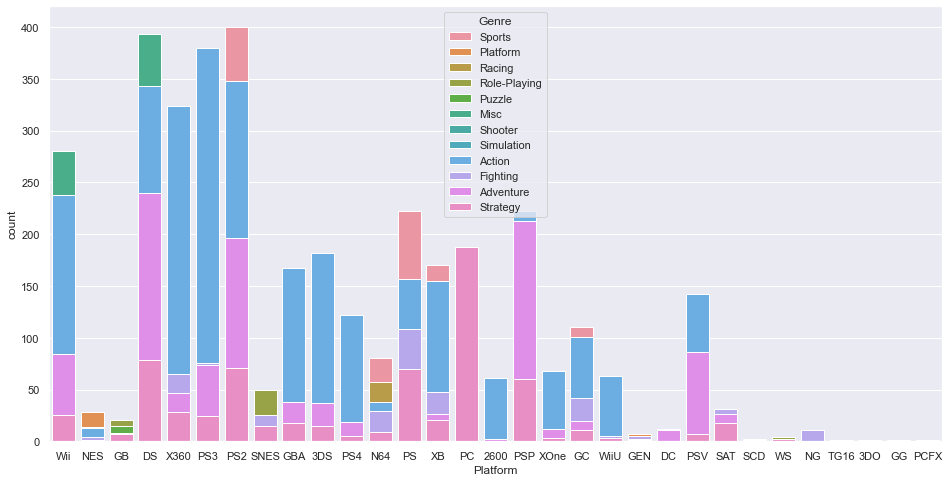

In [13]:
plt.figure(figsize=(16,8))
sns.countplot('Platform',hue='Genre',data=df,dodge=False)

from the above graph we can see that the platforms with most games are PS2,DS,PS3, also we can see that platforms such as PS3,PS2 and X360 are dominated by action genre games 

## Now let's see top global sales according to their platform and genre

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

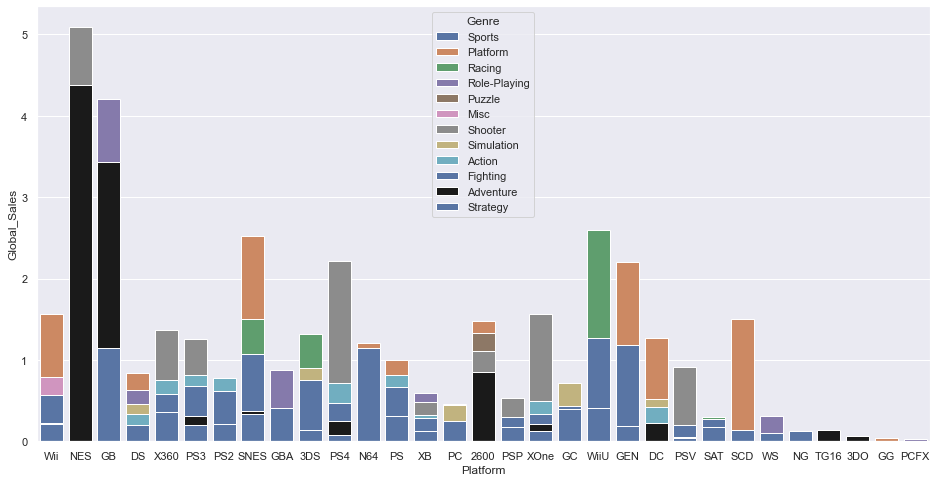

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df,dodge=False,palette=["C0", "C1", "C2","C4",
                                                                                   "C5","C6","C7","C8","C9","C10","k"],ci=None)